In [67]:
import tensorflow as tf
from tensorflow import  keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [68]:
df=pd.read_csv("Telco_customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4554,4329-YPDDQ,Male,0,No,No,20,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.20,2203.7,No
6082,4523-WXCEF,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.10,6039.9,Yes
1557,4672-FOTSD,Male,0,No,No,12,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3,No
5295,2144-BFDSO,Female,1,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),108.75,5431.9,No
4976,8165-CBKXO,Male,0,Yes,Yes,66,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),56.75,3708.4,No


In [69]:
df.drop("customerID",axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [72]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [73]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [74]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()].shape

(11, 20)

In [75]:
df0=df[df.TotalCharges!=" "]
df0.shape

(7032, 20)

In [76]:
df0.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
df0.TotalCharges=pd.to_numeric(df0.TotalCharges)


C:\Users\rakoto\AppData\Local\Temp\ipykernel_10208\3357684236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.TotalCharges=pd.to_numeric(df0.TotalCharges)


In [78]:
df0.TotalCharges.dtypes

dtype('float64')

In [79]:
tenure_churn_no=df0[df0.Churn=="No"].tenure
tenure_churn_yes=df0[df0.Churn=="Yes"].tenure

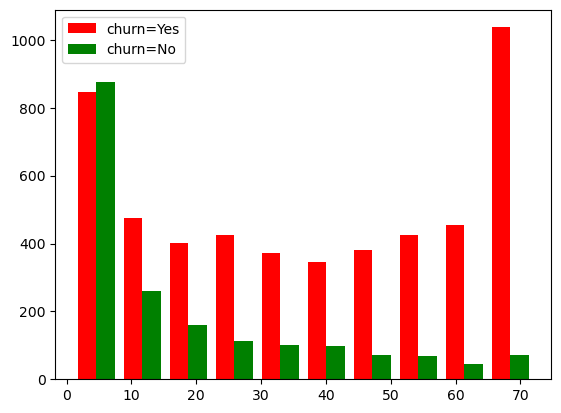

In [80]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=["red","green"],label=["churn=Yes","churn=No"])
plt.legend()

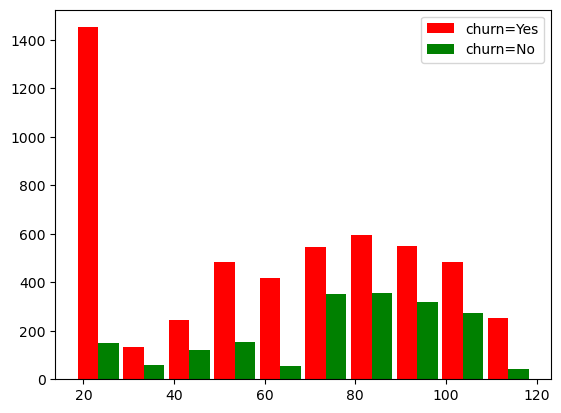

In [81]:
mc_churn_no=df0[df0.Churn=="No"].MonthlyCharges
mc_churn_yes=df0[df0.Churn=="Yes"].MonthlyCharges
plt.hist([mc_churn_no,mc_churn_yes],rwidth=0.9,color=["red","green"],label=["churn=Yes","churn=No"])
plt.legend()

In [82]:
def print_unique_col_value(df0):
    for col in df0:
        if df0[col].dtypes=="object":
            print(f"{col}---------------{df0[col].unique()}")

In [83]:
print_unique_col_value(df0)

gender---------------['Female' 'Male']
Partner---------------['Yes' 'No']
Dependents---------------['No' 'Yes']
PhoneService---------------['No' 'Yes']
MultipleLines---------------['No phone service' 'No' 'Yes']
InternetService---------------['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------['No' 'Yes' 'No internet service']
OnlineBackup---------------['Yes' 'No' 'No internet service']
DeviceProtection---------------['No' 'Yes' 'No internet service']
TechSupport---------------['No' 'Yes' 'No internet service']
StreamingTV---------------['No' 'Yes' 'No internet service']
StreamingMovies---------------['No' 'Yes' 'No internet service']
Contract---------------['Month-to-month' 'One year' 'Two year']
PaperlessBilling---------------['Yes' 'No']
PaymentMethod---------------['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn---------------['No' 'Yes']


In [84]:
df0.replace('No internet service','No',inplace=True)
df0.replace('No phone service','No',inplace=True)

C:\Users\rakoto\AppData\Local\Temp\ipykernel_10208\157923970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.replace('No internet service','No',inplace=True)
C:\Users\rakoto\AppData\Local\Temp\ipykernel_10208\157923970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.replace('No phone service','No',inplace=True)


In [85]:
print_unique_col_value(df0)

gender---------------['Female' 'Male']
Partner---------------['Yes' 'No']
Dependents---------------['No' 'Yes']
PhoneService---------------['No' 'Yes']
MultipleLines---------------['No' 'Yes']
InternetService---------------['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------['No' 'Yes']
OnlineBackup---------------['Yes' 'No']
DeviceProtection---------------['No' 'Yes']
TechSupport---------------['No' 'Yes']
StreamingTV---------------['No' 'Yes']
StreamingMovies---------------['No' 'Yes']
Contract---------------['Month-to-month' 'One year' 'Two year']
PaperlessBilling---------------['Yes' 'No']
PaymentMethod---------------['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn---------------['No' 'Yes']


In [86]:
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
    df0[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\rakoto\AppData\Local\Temp\ipykernel_10208\3998605824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0[col].replace({'Yes':1,'No':0},inplace=True)


In [87]:
for col in df0:
    print(f"{col}---------------{df0[col].unique()}")

gender---------------['Female' 'Male']
SeniorCitizen---------------[0 1]
Partner---------------[1 0]
Dependents---------------[0 1]
tenure---------------[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService---------------[0 1]
MultipleLines---------------[0 1]
InternetService---------------['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------[0 1]
OnlineBackup---------------[1 0]
DeviceProtection---------------[0 1]
TechSupport---------------[0 1]
StreamingTV---------------[0 1]
StreamingMovies---------------[0 1]
Contract---------------['Month-to-month' 'One year' 'Two year']
PaperlessBilling---------------[1 0]
PaymentMethod---------------['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges---------------[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCh

In [88]:
df0["gender"].replace({'Female':1,'Male':0},inplace=True)

C:\Users\rakoto\AppData\Local\Temp\ipykernel_10208\4216551982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["gender"].replace({'Female':1,'Male':0},inplace=True)


In [89]:
df0["gender"].unique()

array([1, 0], dtype=int64)

In [90]:
df0=pd.get_dummies(data=df0,columns=["InternetService","Contract","PaymentMethod"])
df0.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [91]:
df0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2209,0,0,1,0,0.098592,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,0,0,0,0,0.140845,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,0,0,1,1,1.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2914,0,0,0,0,0.436620,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df0.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [99]:
bool_columns=["InternetService_DSL","InternetService_Fiber optic","InternetService_No","Contract_Month-to-month","Contract_One year","Contract_Two year","PaymentMethod_Bank transfer (automatic)","PaymentMethod_Credit card (automatic)","PaymentMethod_Electronic check","PaymentMethod_Mailed check"]
for col in bool_columns:
    df0[col].replace({False:0,True:0},inplace=True)

In [100]:
df0.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [105]:
X=df0.drop("Churn",axis=1)
Y=df0["Churn"]

In [106]:
from sklearn.model_selection import  train_test_split

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [109]:
X_train.shape

(5625, 26)

In [110]:
X_train.shape

(5625, 26)

In [114]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 16.7665 - accuracy: 0.6112
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.7196
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7484
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7582
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7708
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.7675
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7771
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7696
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.7653
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5645 - accur

In [115]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7683


[0.466943621635437, 0.7683013677597046]

In [117]:
yp=model.predict(X_test)
yp[:5]

 1/44 [..............................] - ETA: 2s

44/44 [==============================] - 0s 9ms/step


array([[0.16333966],
       [0.35206223],
       [0.04391459],
       [0.787344  ],
       [0.67066723]], dtype=float32)

In [119]:
y_pred=[]

for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       999
           1       0.59      0.64      0.61       408

    accuracy                           0.77      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.77      0.77      0.77      1407

